In [67]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [68]:
# read data from indian_food 
df = pd.read_csv("../data/cuisines.csv")
df.head(2)

,name,image_url,description,cuisine,course,diet,prep_time,ingredients,instructions
0,Thayir Semiya Recipe (Curd Semiya),https://www.archanaskitchen.com/images/archana...,Thayir Semiya or Curd Vermicelli is a quick di...,Indian,Lunch,Vegetarian,Total in 35 M,\n\n\t\t\t\t\t\t\t \t\t1/2 cup Semiya (Vermice...,"To begin making the Thayir Semiya recipe, firs..."
1,Chettinad Style Kara Kuzhambu Recipe with Pota...,https://www.archanaskitchen.com/images/archana...,Chettinad Style Kara Kuzhambu Recipe with Pot...,South Indian Recipes,Lunch,Vegetarian,Total in 75 M,\nFor ground masala\n\n\t\t\t\t\t\t\t \t\t1/4 ...,To begin making the Chettinad Style Kara Kuzha...


In [69]:
df.isnull().sum()

name             0
image_url        0
description      0
cuisine          6
course          38
diet            37
prep_time       10
ingredients      0
instructions     0
dtype: int64

In [70]:
df['course'].isnull().values.sum()

38

<Axes: ylabel='Density'>

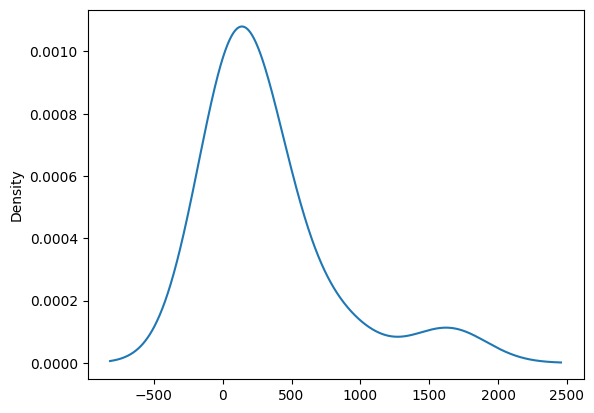

In [71]:

df['course'].value_counts().plot(kind='kde')

In [72]:
# drop null values from course column
df = df[df["course"].notnull()]

In [73]:
df.isnull().sum()

name             0
image_url        0
description      0
cuisine          2
course           0
diet            11
prep_time        6
ingredients      0
instructions     0
dtype: int64

In [74]:
df['diet'].value_counts()

diet
Vegetarian                      2846
High Protein Vegetarian          514
Non Vegeterian                   240
Diabetic Friendly                236
High Protein Non Vegetarian      139
Eggetarian                        95
No Onion No Garlic (Sattvic)      60
Gluten Free                       36
Vegan                             21
Name: count, dtype: int64

In [75]:
# drop null values from diet column
df = df[df["diet"].notnull()]

In [76]:
df.isnull().sum()

name            0
image_url       0
description     0
cuisine         2
course          0
diet            0
prep_time       6
ingredients     0
instructions    0
dtype: int64

In [77]:
df.shape

(4187, 9)

In [78]:
df['cuisine'].value_counts()

cuisine
North Indian Recipes         819
Indian                       803
South Indian Recipes         627
Bengali Recipes              163
Kerala Recipes               159
Tamil Nadu                   158
Maharashtrian Recipes        136
Karnataka                    132
Gujarati Recipes﻿            124
Rajasthani                   116
Andhra                       116
Punjabi                       86
Goan Recipes                  83
Chettinad                     67
Kashmiri                      58
Mangalorean                   44
Awadhi                        36
Parsi Recipes                 35
Sindhi                        32
Mughlai                       31
Konkan                        31
Oriya Recipes                 29
Hyderabadi                    27
Assamese                      26
Bihari                        22
North East India Recipes      20
Himachal                      17
Fusion                        16
Coorg                         15
Coastal Karnataka             14
No

In [79]:
# drop null values from cuisine column
df = df[df["cuisine"].notnull()]

In [80]:
df.isnull().sum()

name            0
image_url       0
description     0
cuisine         0
course          0
diet            0
prep_time       6
ingredients     0
instructions    0
dtype: int64

In [81]:
df['prep_time'].value_counts()

prep_time
Total in 40 M     651
Total in 30 M     547
Total in 50 M     468
Total in 35 M     364
Total in 45 M     357
                 ... 
Total in 200 M      1
Total in 560 M      1
Total in 425 M      1
Total in 410 M      1
Total in 235 M      1
Name: count, Length: 119, dtype: int64

In [82]:
# drop null values from prep_time column
df = df[df["prep_time"].notnull()]

In [83]:
df.isnull().sum()

name            0
image_url       0
description     0
cuisine         0
course          0
diet            0
prep_time       0
ingredients     0
instructions    0
dtype: int64

In [84]:
df.shape

(4179, 9)

In [85]:
# prep_time modification
df['prep_time']

0        Total in 35 M
1        Total in 75 M
2       Total in 530 M
3        Total in 55 M
4        Total in 30 M
             ...      
4231     Total in 40 M
4232     Total in 50 M
4233     Total in 40 M
4234     Total in 25 M
4235     Total in 40 M
Name: prep_time, Length: 4179, dtype: object

In [86]:
df['prep_time'] = df['prep_time'].str.replace(',','').str.findall(r'(\d+)').apply(lambda x:x[0]) 

In [87]:
df['prep_time']

0        35
1        75
2       530
3        55
4        30
       ... 
4231     40
4232     50
4233     40
4234     25
4235     40
Name: prep_time, Length: 4179, dtype: object

In [88]:
df.head(2)

,name,image_url,description,cuisine,course,diet,prep_time,ingredients,instructions
0,Thayir Semiya Recipe (Curd Semiya),https://www.archanaskitchen.com/images/archana...,Thayir Semiya or Curd Vermicelli is a quick di...,Indian,Lunch,Vegetarian,35,\n\n\t\t\t\t\t\t\t \t\t1/2 cup Semiya (Vermice...,"To begin making the Thayir Semiya recipe, firs..."
1,Chettinad Style Kara Kuzhambu Recipe with Pota...,https://www.archanaskitchen.com/images/archana...,Chettinad Style Kara Kuzhambu Recipe with Pot...,South Indian Recipes,Lunch,Vegetarian,75,\nFor ground masala\n\n\t\t\t\t\t\t\t \t\t1/4 ...,To begin making the Chettinad Style Kara Kuzha...


In [89]:
# removing \t and \n from ingredients
s = df["ingredients"].str
table = str.maketrans('', '', '\n\t')
df["ingredients"] = s.translate(table)

In [90]:
df['ingredients'] = df['ingredients'].str.lower()

In [91]:
df['ingredients'][0]

' 1/2 cup semiya (vermicelli) , roasted  1 cup curd (dahi / yogurt) for tempering 1 teaspoon mustard seeds (rai/ kadugu)  1/2 teaspoon white urad dal (split)  pinch asafoetida (hing)  1 sprig curry leaves  2 teaspoon oil raw peanuts (moongphali)  1 sprig curry leaves  2 teaspoon oil  5 to 6 cashew nuts , for garnishing '

In [92]:
# creating a columna and store yes or no if it contais milk
df["contain_milk"] = df["ingredients"].apply(lambda x: "1" if "milk" in x else "0")


In [93]:
# creating a column and store yes or no if it contais curd, dahi or yogurt 
df['contain_curd'] = df['ingredients'].apply(lambda a: '1' if 'curd' in a or 'dahi' in a or 'yogurt' in a else '0' )

In [94]:
# creating a column and store yes or no if it contais onion or garlic 
df['onion/garlic'] = df['ingredients'].apply(lambda a: '1' if 'onions' in a or 'garlic' in a or 'onion' in a else '0' )

In [95]:
df.head(5)

,name,image_url,description,cuisine,course,diet,prep_time,ingredients,instructions,contain_milk,contain_curd,onion/garlic
0,Thayir Semiya Recipe (Curd Semiya),https://www.archanaskitchen.com/images/archana...,Thayir Semiya or Curd Vermicelli is a quick di...,Indian,Lunch,Vegetarian,35,"1/2 cup semiya (vermicelli) , roasted 1 cup ...","To begin making the Thayir Semiya recipe, firs...",0,1,0
1,Chettinad Style Kara Kuzhambu Recipe with Pota...,https://www.archanaskitchen.com/images/archana...,Chettinad Style Kara Kuzhambu Recipe with Pot...,South Indian Recipes,Lunch,Vegetarian,75,for ground masala 1/4 teaspoon methi seeds (fe...,To begin making the Chettinad Style Kara Kuzha...,0,0,1
2,Goan Chana Ros Recipe (White Peas Curry),https://www.archanaskitchen.com/images/archana...,Goan Chana Ros is a vegetarian dish from Goan ...,Goan Recipes,Lunch,Vegetarian,530,"1/2 cup dried green peas (vatana) , soaked ov...","To prepare Goan Chana Ros recipe, soak the whi...",0,0,1
3,Minced Meat And Egg Croquettes Recipe,https://www.archanaskitchen.com/images/archana...,The croquette is usually cigar shaped or cylin...,North Indian Recipes,Appetizer,Non Vegeterian,55,"500 grams mutton , minced 4 whole eggs , boi...",To begin making the Minced Meat And Egg Croque...,0,0,1
4,Thekera Tenga Recipe,https://www.archanaskitchen.com/images/archana...,Thekera Tenga is a Sour curry from Assamese cu...,Assamese,Dinner,Vegetarian,30,"4 potatoes (aloo) , thinly sliced 1 tablespo...","To begin making the Thekera Tenga recipe, Heat...",0,0,0


In [96]:
df['prep_time'] = df['prep_time'].astype(int)


In [97]:
df[df['prep_time'] > 600]

,name,image_url,description,cuisine,course,diet,prep_time,ingredients,instructions,contain_milk,contain_curd,onion/garlic
646,Badam Elaichi Kulfi Recipe,https://www.archanaskitchen.com/images/archana...,Badam Elaichi Kulfi is the best choice to beat...,North Indian Recipes,Dessert,Vegetarian,630,"2 liter milk , full fat+ 1 cup 1 cup whole a...","To begin making the Badam Elaichi Kulfi, we wi...",1,0,0
1461,Kerala Style Appam Recipe Without Yeast,https://www.archanaskitchen.com/images/archana...,The Kerala Style Appam Recipe is one dish that...,Kerala Recipes,South Indian Breakfast,Gluten Free,620,"500 grams rice , raw 2 teaspoon methi seeds ...","To begin making the Kerala Style Appam, we nee...",0,0,0
2235,छोले पिंडी रेसिपी - Chole Pindi Recipe,https://www.archanaskitchen.com/images/archana...,छोले पिंडी रेसिपी एक पारम्परिक रेसिपी है जिसे ...,North Indian Recipes,Lunch,Vegetarian,620,"1 कप काला चना , रात भर भिगो ले 2 इलाइची 1 प...",छोले पिंडी रेसिपी बनाने के लिए सबसे पहले हम का...,0,0,0
2998,Barnyard Millet Idli And Dosa Recipe,https://www.archanaskitchen.com/images/archana...,"This No-Rice, Barnyard Millet Idli and Dosa is...",South Indian Recipes,Indian Breakfast,Diabetic Friendly,730,2 cups barnyard millet 3/4 cup sabudana (tap...,To begin making the Barnyard Millet Idli And D...,0,0,0
3048,Chole Pindi Recipe (Spicy Chickpea Curry),https://www.archanaskitchen.com/images/archana...,Chole Pindi Recipe is a very traditional recip...,North Indian Recipes,Lunch,Vegetarian,620,"1 cup kala chana (brown chickpeas) , soaked o...","To begin making the Chole Pindi Recipe, we wil...",0,0,1
3063,Kollu Masala Dosa Recipe - High Protein Horse ...,https://www.archanaskitchen.com/images/archana...,"A famous Konkani cuisine recipe, Horse Gram do...",Konkan,South Indian Breakfast,Vegetarian,960,1 cup rice 1/2 cup horse gram dal (kollu/ ku...,"To make Horse Gram Masala Dosa Recipe, first c...",0,0,1
3390,छोले पिंडी रेसिपी - Chole Pindi (Recipe In Hindi),https://www.archanaskitchen.com/images/archana...,छोले पिंडी उत्तर भारत की एक स्वादिष्ट रेसिपी ह...,North Indian Recipes,Lunch,Vegetarian,620,"1 कप काबुली चना या छोला , रात भर भिगो ले 2 इ...",छोले पिंडी बनाने के लिए सबसे पहले छोले को प्रे...,0,0,0
3653,भगारा पीठा रेसिपी - Baghara Pitha (Recipe In H...,https://www.archanaskitchen.com/images/archana...,उरददाल से बने ओडीया उत्तपम को ओडीया मे भगारा प...,Oriya Recipes,Indian Breakfast,Vegetarian,1470,1 कप सफेद उरद दाल (split) 1 बड़े चमच्च मेथी क...,भगारा पीठा बनाने के लिए सबसे पहले उरददाल और मे...,0,0,0


<Axes: ylabel='Frequency'>

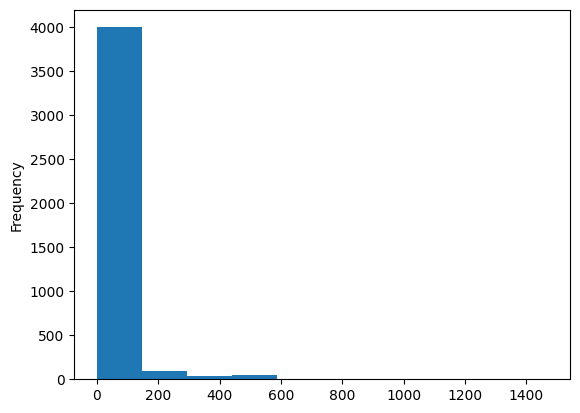

In [98]:
df['prep_time'].plot.hist()

In [99]:
df[df['prep_time']>600].index

Index([646, 1461, 2235, 2998, 3048, 3063, 3390, 3653], dtype='int64')

In [100]:
# dropp the rows where preptime is > 620 
df.drop(df[df['prep_time']>600].index, inplace=True)

<Axes: ylabel='Frequency'>

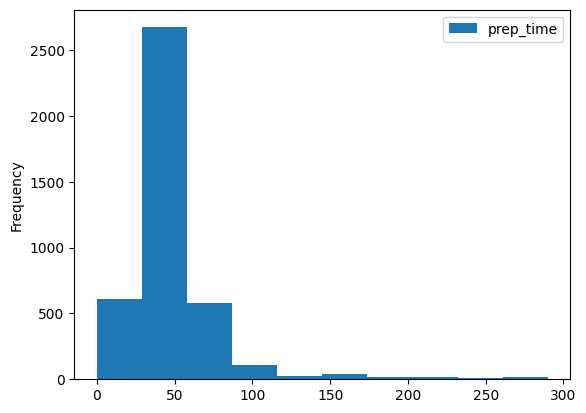

In [101]:
df[df['prep_time']<300].plot.hist()

<Axes: ylabel='Frequency'>

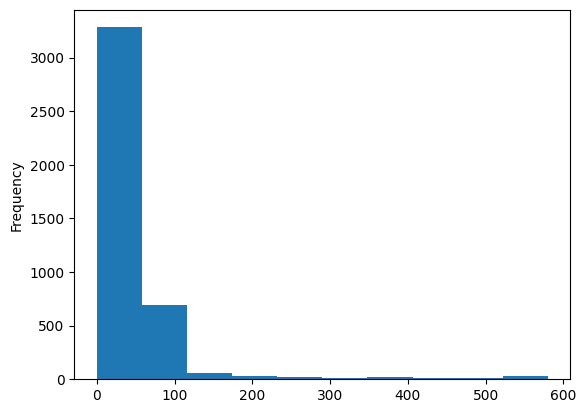

In [102]:
df['prep_time'].plot.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x25d9d387550>,
 'caps': [<matplotlib.lines.Line2D at 0x25d9d398cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25d9d368150>],
 'medians': [<matplotlib.lines.Line2D at 0x25d9d39a350>],
 'fliers': [<matplotlib.lines.Line2D at 0x25d9d398c10>],
 'means': []}

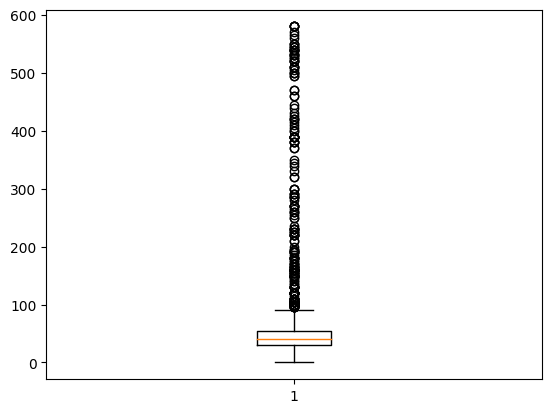

In [103]:
plt.boxplot(df['prep_time'])

In [104]:
df.head(5)

,name,image_url,description,cuisine,course,diet,prep_time,ingredients,instructions,contain_milk,contain_curd,onion/garlic
0,Thayir Semiya Recipe (Curd Semiya),https://www.archanaskitchen.com/images/archana...,Thayir Semiya or Curd Vermicelli is a quick di...,Indian,Lunch,Vegetarian,35,"1/2 cup semiya (vermicelli) , roasted 1 cup ...","To begin making the Thayir Semiya recipe, firs...",0,1,0
1,Chettinad Style Kara Kuzhambu Recipe with Pota...,https://www.archanaskitchen.com/images/archana...,Chettinad Style Kara Kuzhambu Recipe with Pot...,South Indian Recipes,Lunch,Vegetarian,75,for ground masala 1/4 teaspoon methi seeds (fe...,To begin making the Chettinad Style Kara Kuzha...,0,0,1
2,Goan Chana Ros Recipe (White Peas Curry),https://www.archanaskitchen.com/images/archana...,Goan Chana Ros is a vegetarian dish from Goan ...,Goan Recipes,Lunch,Vegetarian,530,"1/2 cup dried green peas (vatana) , soaked ov...","To prepare Goan Chana Ros recipe, soak the whi...",0,0,1
3,Minced Meat And Egg Croquettes Recipe,https://www.archanaskitchen.com/images/archana...,The croquette is usually cigar shaped or cylin...,North Indian Recipes,Appetizer,Non Vegeterian,55,"500 grams mutton , minced 4 whole eggs , boi...",To begin making the Minced Meat And Egg Croque...,0,0,1
4,Thekera Tenga Recipe,https://www.archanaskitchen.com/images/archana...,Thekera Tenga is a Sour curry from Assamese cu...,Assamese,Dinner,Vegetarian,30,"4 potatoes (aloo) , thinly sliced 1 tablespo...","To begin making the Thekera Tenga recipe, Heat...",0,0,0


C:\Users\dell\AppData\Local\Temp\ipykernel_3292\3616772455.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['prep_time'], ax=ax, color='blue', hist=True, kde=True)


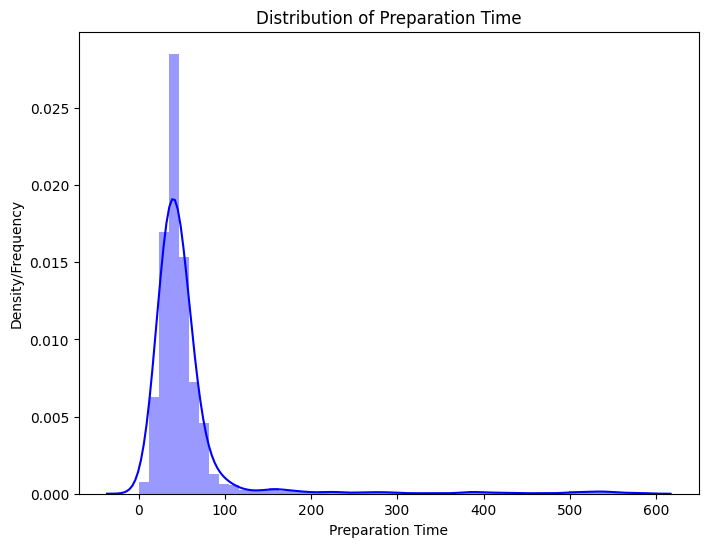

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with a 'prep_time' column
# Replace 'df' with the actual name of your DataFrame

# Plotting KDE and Histogram
fig, ax = plt.subplots(figsize=(8, 6))

# KDE plot and Histogram
sns.distplot(df['prep_time'], ax=ax, color='blue', hist=True, kde=True)

# Setting labels and titles
ax.set_xlabel('Preparation Time')
ax.set_ylabel('Density/Frequency')
ax.set_title('Distribution of Preparation Time')

# Display the plot
plt.show()


In [106]:
df.to_csv('../data/food_prediction_cleaned_data.csv')

In [107]:
df.head(1)

,name,image_url,description,cuisine,course,diet,prep_time,ingredients,instructions,contain_milk,contain_curd,onion/garlic
0,Thayir Semiya Recipe (Curd Semiya),https://www.archanaskitchen.com/images/archana...,Thayir Semiya or Curd Vermicelli is a quick di...,Indian,Lunch,Vegetarian,35,"1/2 cup semiya (vermicelli) , roasted 1 cup ...","To begin making the Thayir Semiya recipe, firs...",0,1,0


In [108]:
x = df[["cuisine","course","diet","prep_time","contain_milk","contain_curd","onion/garlic"]]
y = df['name']

In [109]:
y

0                      Thayir Semiya Recipe (Curd Semiya)
1       Chettinad Style Kara Kuzhambu Recipe with Pota...
2                Goan Chana Ros Recipe (White Peas Curry)
3                   Minced Meat And Egg Croquettes Recipe
4                                    Thekera Tenga Recipe
                              ...                        
4231    Stir Fry Green beans and Tofu with Panch Phoro...
4232                     Dhuska Recipe (Rice Fried Bread)
4233    Khatta Meetha Petha Recipe (Yellow Pumpkin Sabzi)
4234    Patta Gobi Matar Nu Shaak Recipe (Cabbage & Pe...
4235    Kerala Pumpkin Pachadi Recipe (Parangikai Pach...
Name: name, Length: 4171, dtype: object

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=2)

In [111]:
X_train

,cuisine,course,diet,prep_time,contain_milk,contain_curd,onion/garlic
3905,North Indian Recipes,Dessert,Vegetarian,40,1,0,0
2420,South Karnataka,Snack,Vegetarian,180,0,0,0
2019,Andhra,Lunch,Vegetarian,45,0,0,1
1240,North Indian Recipes,Lunch,High Protein Vegetarian,30,0,0,1
2180,South Indian Recipes,Lunch,Vegetarian,50,0,0,0
...,...,...,...,...,...,...,...
3379,Mughlai,Indian Breakfast,Vegetarian,50,0,0,0
1108,North Karnataka,Side Dish,Vegetarian,30,0,0,1
2550,Kerala Recipes,Lunch,Vegetarian,50,0,0,0
3657,Indian,Lunch,High Protein Vegetarian,30,0,0,1


In [112]:
# importing libraries
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
from sklearn.preprocessing import OneHotEncoder # Onehot Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [114]:
categorical_cols = x.select_dtypes(include='object').columns
numerical_cols = x.select_dtypes(exclude='object').columns

In [115]:
print(categorical_cols)
print(numerical_cols)

Index(['cuisine', 'course', 'diet', 'contain_milk', 'contain_curd',
       'onion/garlic'],
      dtype='object')
Index(['prep_time'], dtype='object')


In [116]:
df['prep_time'].dtype

dtype('int32')

In [117]:
numerical_cols.dtype

dtype('O')

In [119]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('scaler',StandardScaler(with_mean=False))

    ]
)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('ordinalencoder',OneHotEncoder(sparse=False)),
    ('scaler',StandardScaler(with_mean=False))
    ]
)

#column transformer
preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [120]:
X_test.head(1)

,cuisine,course,diet,prep_time,contain_milk,contain_curd,onion/garlic
1143,Karnataka,Side Dish,Vegetarian,25,0,0,0


In [121]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 1143 to 2137
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cuisine       1043 non-null   object
 1   course        1043 non-null   object
 2   diet          1043 non-null   object
 3   prep_time     1043 non-null   int32 
 4   contain_milk  1043 non-null   object
 5   contain_curd  1043 non-null   object
 6   onion/garlic  1043 non-null   object
dtypes: int32(1), object(6)
memory usage: 61.1+ KB


In [54]:
X_train_processed=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test_processed=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

f:\Project\food hub\food_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [66]:
X_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3128 entries, 0 to 3127
Data columns (total 83 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   num_pipeline__prep_time                          3128 non-null   float64
 1   cat_pipeline__cuisine_Afghan                     3128 non-null   float64
 2   cat_pipeline__cuisine_Andhra                     3128 non-null   float64
 3   cat_pipeline__cuisine_Arab                       3128 non-null   float64
 4   cat_pipeline__cuisine_Asian                      3128 non-null   float64
 5   cat_pipeline__cuisine_Assamese                   3128 non-null   float64
 6   cat_pipeline__cuisine_Awadhi                     3128 non-null   float64
 7   cat_pipeline__cuisine_Bengali Recipes            3128 non-null   float64
 8   cat_pipeline__cuisine_Bihari                     3128 non-null   float64
 9   cat_pipeline__cuisine_Chettina

In [55]:
X_test_processed.head(1)

,num_pipeline__prep_time,cat_pipeline__cuisine_Afghan,cat_pipeline__cuisine_Andhra,cat_pipeline__cuisine_Arab,cat_pipeline__cuisine_Asian,cat_pipeline__cuisine_Assamese,cat_pipeline__cuisine_Awadhi,cat_pipeline__cuisine_Bengali Recipes,cat_pipeline__cuisine_Bihari,cat_pipeline__cuisine_Chettinad,...,cat_pipeline__diet_No Onion No Garlic (Sattvic),cat_pipeline__diet_Non Vegeterian,cat_pipeline__diet_Vegan,cat_pipeline__diet_Vegetarian,cat_pipeline__contain_milk_0,cat_pipeline__contain_milk_1,cat_pipeline__contain_curd_0,cat_pipeline__contain_curd_1,cat_pipeline__onion/garlic_0,cat_pipeline__onion/garlic_1
0,0.363272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.150034,3.238026,0.0,3.100114,0.0,2.044632,0.0


In [56]:
## Model Training

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [57]:
import numpy as np
from sklearn.metrics import accuracy_score

def evaluate_model(true, predicted):
    acc_score = accuracy_score(true, predicted)
    return acc_score

In [58]:
y_train

3905                       Carrot Semolina Phirni Recipe 
2420     Akki Peni Sandige Recipe - Rice idiyappam Fryums
2019    Gongura Pappu Recipe - Gongura/ Sorrel Leaves Dal
1240                                       Dal Fry Recipe
2180     Chow Chow Curry Recipe - Chayote Squash Stir Fry
                              ...                        
3379        डोली की रोटी - Doli Ki Roti (Recipe In Hindi)
1108                         Gurellu Chutney Podi Recipe 
2550    केरल की कटहल सब्ज़ी रेसिपी - Kerala Style Jack ...
3657                                    Soya Chunks Sabzi
2611         Puli Upma Recipe - Tamarind & Rice Rava Upma
Name: name, Length: 3128, dtype: object

In [59]:
## Train multiple models

models={
    'RandomForest':RandomForestClassifier(random_state=42),
    # 'LogisticRegression':LogisticRegression(),
    # 'SVM':SVC(kernel='poly', degree=3, C=1),
}

trained_model_list=[]
model_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train_processed,y_train)

    #Make Predictions
    y_pred=model.predict(X_test_processed)

    acc_score=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("Accuracy Score:",acc_score)
    print('\n')

RandomForest
Model Training Performance
Accuracy Score: 0.003835091083413231




In [60]:
# import pickle
# # Dump the trained Naive Bayes classifier with Pickle
# XB_pkl_filename = '../models/XGBoost.pkl'
# # Open the file to save as pkl file
# XB_Model_pkl = open(XB_pkl_filename, 'wb')
# pickle.dump(XB, XB_Model_pkl)
# # Close the pickle instances
# XB_Model_pkl.close()

In [61]:
# import pickle

# with open("model.pickle", "wb") as f:
#     pickle.dump(model, f)

In [62]:
data = {
    'cuisine': "Rajasthani",
    'course': "Dinner",
    'diet': "Non Vegeterian",
    'prep_time': 50,
    'contain_milk': "1",
    'contain_curd': "1",
    'onion/garlic': "1"
}
dfpd = pd.DataFrame(data,index=[458])
dfpd

,cuisine,course,diet,prep_time,contain_milk,contain_curd,onion/garlic
458,Rajasthani,Dinner,Non Vegeterian,50,1,1,1


In [63]:
X_test_one=pd.DataFrame(preprocessor.transform(dfpd),columns=preprocessor.get_feature_names_out())
y_pred_one=model.predict(X_test_one)

In [64]:
y_pred_one

array(['Rajasthani Style Mutton Banjara Recipe '], dtype=object)

In [65]:
df[df['name']=="Rajasthani Style Mutton Banjara Recipe "]

,name,image_url,description,cuisine,course,diet,prep_time,ingredients,instructions,contain_milk,contain_curd,onion/garlic
586,Rajasthani Style Mutton Banjara Recipe,https://www.archanaskitchen.com/images/archana...,The easiest Mutton Curry made with simple ingr...,Rajasthani,Dinner,Non Vegeterian,50,750 grams mutton 2 tablespoons mustard oil ...,To begin making the Rajasthani Mutton Banjara ...,0,1,1
